# Python for Data Science Project Session 2: Physics and Engineering

In this project session, we will look at four mini-topics related to physics and engineering, applying the techniques we learnt in the second teaching session regarding the use of `matplotlib` for visualisation.

We start by importing all packages required for this session.

In [2]:
import math
import random

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

> **Note**
>
> Notice how we have split up our imports into two groups. When importing packages in Python, the convention is to split built-in, 3rd-party and user-written imports with a blank line. 

## Signal Processing

The first topic we will look at is signal processing. In this, we will plot the interface patterns of multiple sine waves.

Before we get started on that, we need to introduce a methodology for plotting generic functions using `matplotlib`. To do this, we will introduce a small amount of `numpy` code (which we will cover in detail in the next teaching session).

Namely, we can use `np.linspace` to generate a sequence of equally spaced points. View [the documentation](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) to understand what each of the three parameters are for.

In [4]:
xs = np.linspace(-10, 10, 1000)

We can then write a function for the operation we want to perform and use a list comprehension to apply it to each value of x.

In [5]:
def f(x):
    return x**3 - 2 * x**2 + 3 * x - 2

ys = [f(x) for x in xs]

> **Note**
>
> There are cleaner ways to do this using just `numpy` but we will have to wait for next week to cover them

Or, if the function is short enough, we can put it directly into the list comprehension.

In [6]:
ys = [x**3 - 2 * x**2 + 3 * x - 2 for x in xs]

Once we have corresponding pairs of x and y values, we can plot them using `matplotlib`.

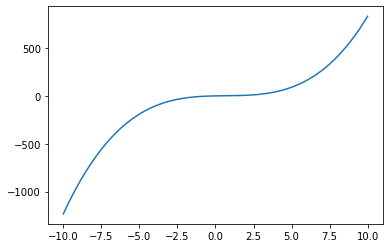

In [7]:
fig, ax = plt.subplots()
ax.plot(xs, ys)
plt.show()

Even though this curve looks smooth, it is actual made of multiple short lines (1000 to be exact). When plotting functions we have to choose the value of the `num` parameter of `np.linspace` carefully; too small and our plot will look choppy, but too large and our code will take a long time to run.

With that out of the way, let's start off our signal processing.

Create a variable `xs` containing 1000 points equally spaced between -5 and 5. Use three list comprehensions and `math.sin()` to create three lists `y1s`, `y2s`, `y3s` given by

$$y_1 = \sin(x) \\ y_2 = \sin(2x) \\ y_3 = \sin(3x)$$

In [16]:
# Create xs and y#s
xs = np.linspace(-5, 5, 1000)
y1s = [math.sin(x) for x in xs]
y2s = [math.sin(2 * x) for x in xs]
y3s = [math.sin(3 * x) for x in xs]

Plot these three curves on the same set of axes and add a legend giving the formula of each curve. Set the y limits to be ±1.5.

> **Bonus**
>
> If you're familiar with LaTeX, note that you are free to use it in axis, legend, and plot labels.

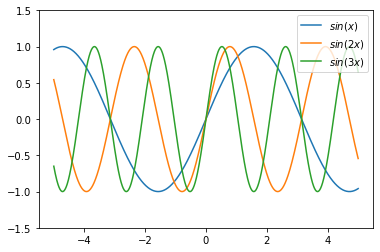

In [17]:
# Plot the three sine waves
fig, ax = plt.subplots()
ax.plot(xs, y1s, label='$sin(x)$')
ax.plot(xs, y2s, label='$sin(2x)$')
ax.plot(xs, y3s, label='$sin(3x)$')
ax.set_ylim(-1.5, 1.5)
ax.legend()
plt.show()

Create a new variable `zs` which is the element-wise sum of `y1s`, `y2s` and `y3s`. Note, you can't just use `y1s + y2s + y3s` as this gives the concatenation of the three lists.

> **Hints**
>
> There are a few approaches:
> 1. (Simple) Set `zs = []`, loop through `i in range(len(y1s))` and append the sum of the corresponding `y#s` to `zs` at each point
> 2. (Clean) Use list comprehension on the `zip` of the `y#s`

In [18]:
# Calculate the sum of the function outputs
zs = [y1 + y2 + y3 for y1, y2, y3 in zip(y1s, y2s, y3s)]

Take the plot from before but modify it so the lines are dashed and 50% transparent. Also, increase the figure size to 10x6 inches and allow the y limit to be set automatically. Add a black line for `zs`. Label the axes "x" and "f(x)" respectively.

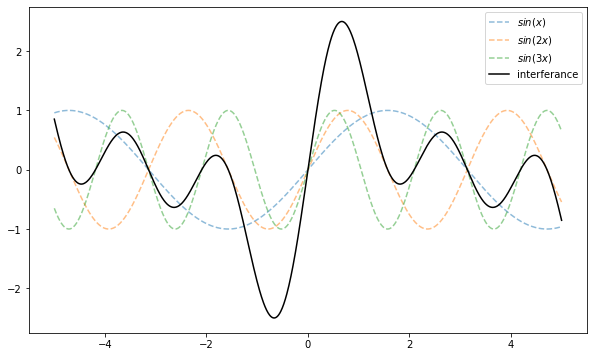

In [20]:
# Plot the original sine waves and their interference patterns
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(xs, y1s, alpha=0.5, ls='--', label='$sin(x)$')
ax.plot(xs, y2s, alpha=0.5, ls='--', label='$sin(2x)$')
ax.plot(xs, y3s, alpha=0.5, ls='--', label='$sin(3x)$')
ax.plot(xs, zs, c='black', label='interferance')
ax.legend()
plt.show()

> **Bonus**
>
> Create a function called `plot_sine_interference(n)` which accepts a positive integer `n` and creates a plot as above but for $\sin(x),\ldots,\sin(nx)$. Instead of using `y1s`...`yns`, it would be best to let `ys` be a list of list and use a `for` loop to add the plots. You are free to stop using the legend for this version.

In [40]:
def plot_sine_interference(n):
    """Plots signal interferance from the sum of sin(x), ..., sin(ns)."""
    xs = np.linspace(-5, 5, 1000)
    yis = []
    
    for i in range(1, n+1):
        yi = [math.sin(i * x) for x in xs]
        yis.append(yi)
    
    zs = [sum(ys) for ys in zip(*yis)]
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    for i, yi in enumerate(yis):
        coef =  str(i+1) if i+1 != 1 else ''
        label = '$sin(' + coef + 'x)$'
        ax.plot(xs, yi, alpha=0.5, ls='--', label=label)
    
    ax.plot(xs, zs, c='black', label='interferance')
    ax.legend()
    plt.show()
    

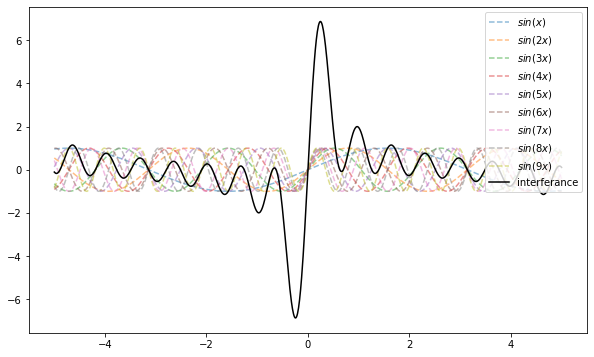

In [163]:
plot_sine_interference(9)

## Brownian Motion

Brownian motion is the pattern generated by random fluctuations in a particles position inside a fluid, a 2D example of which is shown below.

![Brownian motion animation](images/brownian_motion.gif)

In this mini-project, we will plot the trajectories of particles following Brownian motion, given a dataset of there positions over time.

Before we continue, it will likely be helpful to draw attention to the use of Matplotlib within a `for` loop. This is of particular importance when we want to create plots for various subsets of the dataset. We will provide an illustrate example using the iris dataset, giving sepal and petal measurements for three types of iris flowers.

In [3]:
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
iris.to_csv('data/iris.csv', index=False)

In [4]:
iris = pd.read_csv('data/iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


We could manually add each species to the plot, but it is more elegant to loop over the unique values of the column.

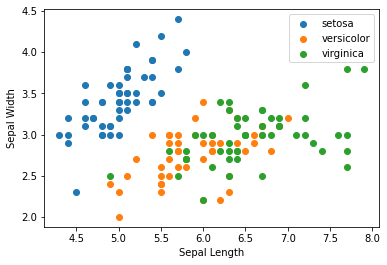

In [45]:
fig, ax = plt.subplots()
for species in iris.species.unique():
    iris_subset = iris.loc[iris.species == species]
    ax.scatter(iris_subset.sepal_length, iris_subset.sepal_width,
               label=species)
ax.legend()
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
plt.show()

You can now download the Brownian motion dataset from the [session resources](https://education.wdss.io/python-for-data-science/session-two/). This consists of the motion of 100 particles relative to their starting point over a one second interval. Import it below.

In [47]:
# Download the Brownian motion dataset
from urllib.request import urlopen
data = urlopen("https://raw.githubusercontent.com/warwickdatasciencesociety/"
               "python-for-data-science/master/session-two/"
               "data/brownian_motion.csv").read().decode('utf-8')

with open('data/brownian_motion.csv', 'w') as f:
    f.write(data)

In [49]:
# Load the Brownian motion dataset
brownian_motion = pd.read_csv('data/brownian_motion.csv')
brownian_motion.head()

,particle,time,x,y
0,1,0.000000,0.000000,0.000000
1,1,0.001001,-0.314079,1.269056
2,1,0.002002,-0.707929,2.082240
3,1,0.003003,0.745656,2.279144
4,1,0.004004,2.004236,2.375846


Create an 8x8 inch line plot showing the paths of each of the particles over time. Use black lines with 80% transparency for each. 

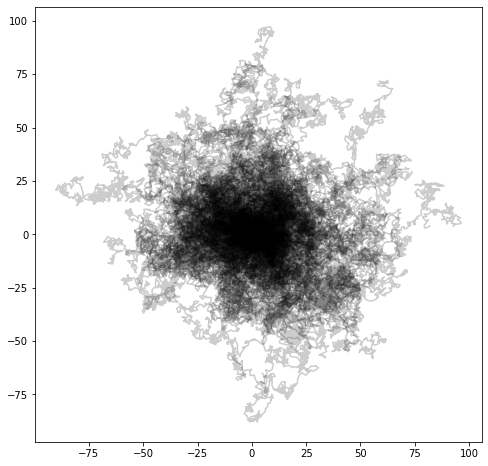

In [65]:
# Plot the Brownian motion
fig, ax = plt.subplots(figsize=(8, 8))

for particle in brownian_motion.particle.unique():
    particle_subset = brownian_motion.loc[brownian_motion.particle == particle]
    ax.plot(particle_subset.x, particle_subset.y, c='black', alpha=0.2)
:

# Plot the Brownian motion
fig, ax = plt.subplots(figsize=(8, 8))
for i in range(1, 101):
    subset = brownian_motion.loc[brownian_motion.particle == i]
    ax.plot(subset.x, subset.y, alpha=0.2, c='black')

:

# Plot the Brownian motion
fig, ax = plt.subplots(figsize=(8, 8))
for i in range(1, 101):
    subset = brownian_motion.loc[brownian_motion.particle == i]
    ax.plot(subset.x, subset.y, alpha=0.2, c='black')


plt.show()

We would now like to add histograms to the top and right of the plot, showing the distribution of the x and y coordinates, respectively. Recreate the above plot using `plt.figure` rather than subplots. Use the bottom-left four-fifths for the line plot and use the top/right fifths for two histograms. The histograms should have 50 bins each, be coloured light grey, and have a black outlines. Note, you can create a rotated histogram using `orientation='horizontal'`. You can also remove axis ticks using `ax.get_xaxis().set_ticks([])`/`ax.get_yaxis().set_ticks([])`

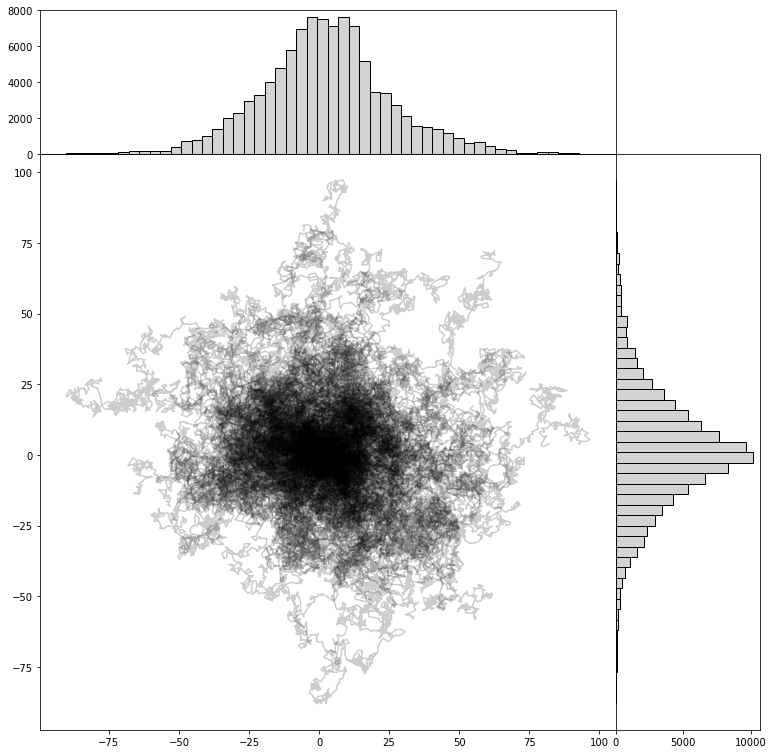

In [81]:
# Add marginal histograms to the plot
fig = plt.figure(figsize=(10, 10))
ax_xy = fig.add_axes([0, 0, 0.8, 0.8])
ax_x = fig.add_axes([0, 0.8, 0.8, 0.2])
ax_y = fig.add_axes([0.8, 0, 0.2, 0.8])

# Main plot
for particle in brownian_motion.particle.unique():
    particle_subset = brownian_motion.loc[brownian_motion.particle == particle]
    ax_xy.plot(particle_subset.x, particle_subset.y, c='black', alpha=0.2)
    
# Histrograms
ax_x.get_xaxis().set_ticks([])
ax_x.hist(brownian_motion.x, bins=50, color='lightgrey', edgecolor='black')
ax_y.get_yaxis().set_ticks([])
ax_y.hist(brownian_motion.y, bins=50, color='lightgrey', edgecolor='black',
         orientation='horizontal')

plt.show()


> **Digressions**
>
> The Brownian motion above is an extremely simple type generated by adding random Gaussian noise to your position at any time step. A sensible question is, is a particle likely to return to its starting position and, if so, after how long. It turns out that the answer depends on the dimension we are looking at. In one dimension, the particle has a 100% chance of returning to the start and will do so on average in a finite amount of time. In two dimensions, there is still a 100% chance of return, but the expected time of return is infinite. In three dimensions, there is a greater than 50% chance of never returning to the start. This observation has lead to the invention of the phrase "a drunk man will eventually find his way home, but a drunk bird might well become lost forever".

## Heatmaps

For the second topic of this session, we will look at generating heat maps. Interestingly, we generate heatmaps using the same method we would use for displaying an image. We will return to how we can load images in the third teaching session.

We will start by providing an example of how we can create such a heatmap. We do this by using the `imshow` method of a set of axes, passing in a 2D list of lists. We will not focus on how we generate such objects since we'll find an easier approach in the next session. Instead we focus on plotting them.

In [82]:
# Hyperbola
z = [[x ** 2 - y ** 2
     for y in np.linspace(-5, 5, 1000)]
    for x in np.linspace(-5, 5, 1000)]

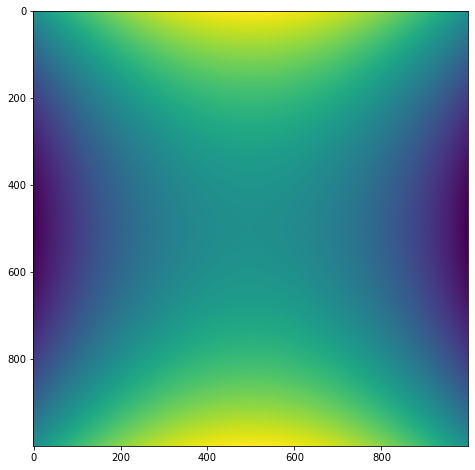

In [83]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(z)
plt.show()

We will use heatmaps to plot the strength of a gravitational field created by $n$ planets. We start by creating a list of planets, giving their position, mass and radius (feel free to play with these after).

In [87]:
planets = [
    {'x': 4, 'y': 2, 'm': 3e5, 'r': 0.2},
    {'x': -1, 'y': 3, 'm': 2e4, 'r': 0.1},
    {'x': -2, 'y': -4, 'm': 5e3, 'r': 0.4},
]

We then use the following code to calculate the logarithm of the sum of all absolute gravitational forces acting on each point in the grid $[-5, 5] \times [-5, 5]$.

In [88]:
z = [[math.log(sum(
    p['m'] / r2 if (r2 := ((p['x']-x)**2 + (p['y']-y)**2)) > p['r']**2 else 0
    for p in planets))
    for y in np.linspace(-5, 5, 200)]
    for x in np.linspace(-5, 5, 200)]

Let's visualise this as a heatmap. Make sure to include a colour bar using the same method as we did for scatter plots. Set the colour map to 'magma' using [the documentation](https://matplotlib.org/stable/tutorials/introductory/customizing.html?highlight=image.cmap#a-sample-matplotlibrc-file) of `imshow`.

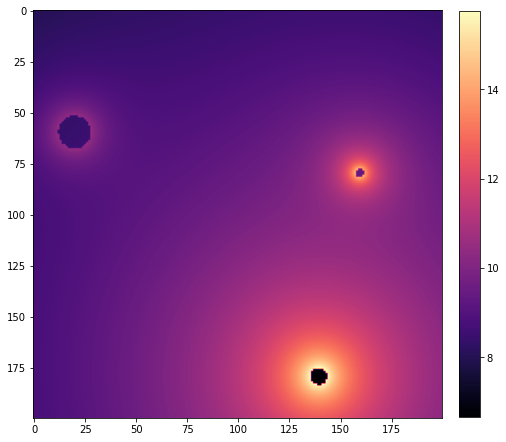

In [114]:
# Create a heatmap of `z`
fig, ax = plt.subplots(figsize=(8, 8))
sc = ax.imshow(z, cmap='magma')
fig.colorbar(sc, fraction=0.0455, pad=0.04)
plt.show()

**(Hard)** At this point, our x and y ticks are not correct. Use `set_xticks` and `set_xticklabels` to correct this.

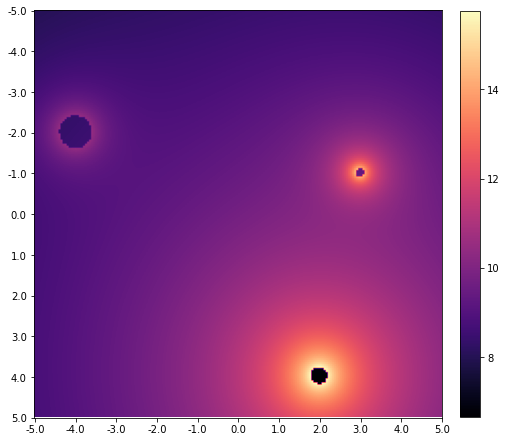

In [117]:
# Correct the axis ticks
# Create a heatmap of `z`
fig, ax = plt.subplots(figsize=(8, 8))
sc = ax.imshow(z, cmap='magma')
ax.set_xticks([i for i in range(0, 220, 20)])
ax.set_xticklabels(np.linspace(-5, 5, 11))
ax.set_yticks([i for i in range(0, 220, 20)])
ax.set_yticklabels(np.linspace(-5, 5, 11))
fig.colorbar(sc, fraction=0.0455, pad=0.04)
plt.show()

## Monte Carlo Simulations

For the last of our mini-projects, we will take a look at Monte Carlo simulation. This sounds fancy, but essentially boils down to using simulation and randomness to answer questions and is incredibly useful for statistical mechanics and numerical methods.

We will look at a textbook of approximating the value of $\pi \approx 3.14159$ with needing to use any maths or equations. We do this by placing points randomly in a 2-by-2 square and asking how many fall inside a circle of radius one placed at its centre as shown below.

<img src="images/pi_monte_carlo.png" alt="Estimating Pi using Monte Carlo Methods" style="width: 400px;"/>

It turns out that if we calculate the ratio of the number of points inside the circle to all points and multiply this by four, we obtain an approximation of $\pi$. An explanation of this is provided in [this video](https://www.youtube.com/watch?v=ELetCV_wX_c).

We will replicate this method for ourselves. The number of points we will generate will be `N`, set initially to be 1000 (feel free to play around with this later).

In [118]:
N = 1000

Start by creating two lists `xs` and `ys` containing random numbers between -1 and 1. To do this, use list comprehensions with `random.uniform(-1, 1)`.

In [119]:
# Generate random x and y coordinates
xs = [random.uniform(-1, 1) for _ in range(N)]
ys = [random.uniform(-1, 1) for _ in range(N)]

Using a similar method to how we created `zs` first mini-project, create a list `in_circle` which is `True` if the corresponding point from `xs` and `ys` is in the circle.

> **Hint**
>
> A point $(x, y)$ is in the circle if and only if $x^2 + y^2 \leq 1$

In [121]:
# Determine which points lie within the circle
in_circle = [True if x**2 + y**2 <= 1 else False for x, y in zip(xs, ys)]

Using `xs`, `ys` and `in_circle`, plot the simulated points coloured by whether they are in the circle. Make sure to use `figsize` to make the plot square and the points are a reasonable size.

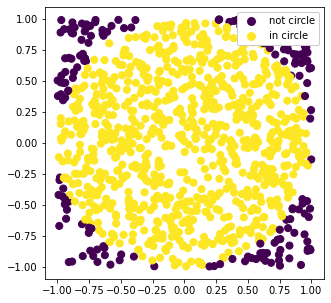

In [161]:
# Plot the simulated points coloured by whether they lie in the circle
from matplotlib.lines import Line2D
cmap = plt.cm.viridis
custom_lines = [Line2D([0], [0], marker='o', color='w', 
                       markerfacecolor=cmap(0.),  markersize=10),
                Line2D([0], [0], marker='o', color='w', 
                       markerfacecolor=cmap(1.),  markersize=10)]

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(xs, ys, c=in_circle, s=50)
ax.legend(custom_lines, ['not circle', 'in circle'], 
          loc='upper right', framealpha=1)
plt.show()

> **Bonus**
>
> Add a custom legend to the plot using [this guide](https://matplotlib.org/stable/gallery/text_labels_and_annotations/custom_legends.html).

Run the following code which creates two lists `ns` and `pis` giving the estimate of $\pi$ we obtain using the first $n$ points.

In [124]:
ns = []
pis = []
count = 0
for n in range(1, N+1):
    ns.append(n)
    count += in_circle[n-1]
    pis.append(4 * count / n)

Create a labelled line plot of `pis` and `ns` and add a horizontal line at $y=3.14159$ by reading [this documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axhline.html).

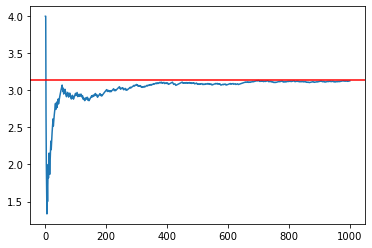

In [129]:
# Plot the convergence of the estimates of pi
fig, ax = plt.subplots()
ax.plot(ns, pis)
ax.axhline(y=3.14, color='r')
plt.show()

> **Bonus**
>
> Can you use a loop to add multiple runs of the simulation to the plot?

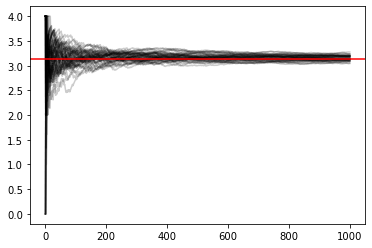

In [136]:
N = 1000
reps = 50

fig, ax = plt.subplots()

for _ in range(reps):
    xs = [random.uniform(-1, 1) for _ in range(N)]
    ys = [random.uniform(-1, 1) for _ in range(N)]
    in_circle = [True if x**2 + y**2 <= 1 else False for x, y in zip(xs, ys)]
    
    ns = []
    pis = []
    count = 0
    for n in range(1, N+1):
        ns.append(n)
        count += in_circle[n-1]
        pis.append(4 * count / n)
    
    ax.plot(ns, pis, c='black', alpha=0.2)

ax.axhline(y=3.14, color='r')
plt.show()